## Investigating my Boston Marathon Data
This file contains the data analysis for the 2016 Boston Marathon


Qualifying times
First I inserted the qualifying times to guide my research and data exploration qualifying times



Men
* 18-34	3:05:00	3:02:32
* 35-39	3:10:00	3:07:32
* 40-44	3:15:00	3:12:32
* 45-49	3:25:00	3:22:32
* 50-54	3:30:00	3:27:32
* 55-59	3:40:00	3:37:32
* 60-64	3:55:00	3:52:32
* 65-69	4:10:00	4:07:32
* 70-74	4:25:00	4:22:32
* 75-79	4:40:00	4:37:32
* 80+	    4:55:00	4:52:32

Women
* 18-34	3:35:00	3:32:32
* 35-39	3:40:00	3:37:32
* 40-44	3:45:00	3:42:32
* 45-49	3:55:00	3:52:32
* 50-54	4:00:00	3:57:32
* 55-59	4:10:00	4:07:32
* 60-64	4:25:00	4:22:32
* 65-69	4:40:00	4:37:32
* 70-74	4:55:00	4:52:32
* 75-79	5:10:00	5:07:32
* 80+   5:25:00	5:22:32


These are some of the questions that I looked at with the analysis

* How many participants are there per age group?
* What is the age group with the most participants?
* What is the mean finish time for each age group separated by gender?
* What is the mean finish time difference between males and females in the same age division?




I started by importing the data

In [1]:
import pandas as pd 

In [2]:
Y2016=pd.read_csv("Boston_Marathon_Data/marathon_results_2016.csv")

In [3]:
Y2016.shape

(26630, 24)

* We have 26630 participants and 24 columns 

In [4]:
Y2016.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 8', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

In [5]:
Y2016.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


* The most important columns in our data are: age, pace, official time, gender, and time at each 5k mark

In [6]:
Y2016['Age'].value_counts()


45    1074
46    1030
40     904
47     869
41     851
50     830
35     773
48     756
38     744
42     740
39     733
51     731
43     724
36     722
44     713
49     674
37     669
55     644
52     642
29     624
34     624
30     618
53     598
31     590
33     580
26     578
27     573
28     573
32     566
56     519
      ... 
61     361
58     352
23     305
59     267
62     226
22     226
65     182
63     176
21     160
64     140
66     119
67     105
20      84
68      71
70      48
69      45
19      41
71      41
72      23
18      22
73      18
74      15
75      13
78       7
76       6
77       6
80       4
83       2
79       2
81       1
Name: Age, Length: 65, dtype: int64

* The age group with the most amount of participants is 45 years of age. 
* The age groups with the least amount of participants are 81 

In [7]:
Y2016['Pace'].describe()

count       26630
unique        546
top       0:08:23
freq          158
Name: Pace, dtype: object

In [8]:
Y2016.groupby('M/F')['Age'].value_counts()

M/F  Age
F    45     462
     46     452
     40     439
     41     436
     35     410
     38     385
     42     380
     47     378
     36     367
     26     364
     29     364
     37     364
     43     356
     39     353
     27     351
     50     342
     28     341
     30     335
     31     328
     44     327
     25     324
     48     314
     33     309
     32     302
     34     299
     49     295
     51     290
     24     266
     52     235
     53     215
           ... 
M    59     194
     25     192
     24     162
     62     159
     65     140
     63     137
     64     105
     23     104
     66      96
     22      93
     67      89
     21      86
     68      57
     20      40
     70      40
     69      39
     71      30
     72      20
     19      17
     73      17
     18      13
     75      13
     74      11
     78       7
     77       6
     76       5
     80       3
     79       2
     81       1
     83       1
Name: Age, Leng

I am grouping the data by gender and age to see how many participants we have separated by gender. For females 40 years has the most amount of participants. For males 25 years has the most amount of participants

In [9]:
age_cuts=[18,35,40,45,50,55,60,65,70,75,80,100]
age_bands=['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79','80 and over']

I am creating the age band divisions used for the qualifying times

In [10]:
len(age_cuts)

12

We have 12 age bands

In [11]:
Y2016['Age_band']=pd.cut(Y2016['Age'], bins=age_cuts, labels=age_bands, 
       right=False)

In [12]:
Y2016.groupby(['M/F', 'Age_band']).size()

M/F  Age_band   
F    18-34          4068
     35-39          1879
     40-44          1938
     45-49          1901
     50-54          1254
     55-59           650
     60-64           346
     65-69           101
     70-74            27
     75-79             1
     80 and over       2
M    18-34          3040
     35-39          1762
     40-44          1994
     45-49          2502
     50-54          2032
     55-59          1563
     60-64           993
     65-69           421
     70-74           118
     75-79            33
     80 and over       5
dtype: int64

Now I have separated participants by age group and gender

Next I created a function to turn the time in hours minutes seconds into minutes

In [13]:
def time_str_to_mins(tstr):
    '''
    convert a string with a race time of the form
    H:M:S, e.g. 3:43:20 to the number of minute
    H*60 + M + S/60
    '''
    
    H,M,S = tstr.split(':')
    
    total_minutes = int(H)*60 + int(M) + int(S)/60
    
    return total_minutes

In [14]:
t="3:24:12"
t.split(':')

['3', '24', '12']

In [15]:
time_str_to_mins(t)

204.2

In [16]:
Y2016['Offical_Time_Mins']=Y2016['Official Time'].map(time_str_to_mins)

In [17]:
Y2016['Offical_Time_Mins'].mean()

235.0430235323566

In [18]:
Y2016.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack()

M/F,F,M
Age_band,,
18-34,240.905683,212.032034
35-39,238.445654,216.374518
40-44,242.285999,216.610523
45-49,248.337489,223.105556
50-54,253.203402,230.980118
55-59,263.897256,240.237001
60-64,274.451541,251.754733
65-69,285.612376,265.603761
70-74,308.965432,283.962147


These are the mean official times by gender and age band in minutes

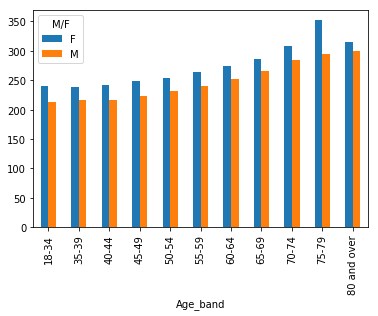

In [20]:
Y2016.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().plot(kind='bar')

The graph illustrates the mean finish time by age group and gender

In [21]:
Y2016.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().diff(-1, axis=1)

M/F,F,M
Age_band,,
18-34,28.873649,NaN
35-39,22.071136,NaN
40-44,25.675476,NaN
45-49,25.231933,NaN
50-54,22.223284,NaN
55-59,23.660255,NaN
60-64,22.696808,NaN
65-69,20.008615,NaN
70-74,25.003285,NaN


The table shows the mean finish time difference between males and females by age group. We can see that it changes by age band significantly

I stopped carrying out further analysis in this notebook because I realized it would be better to do my analysis with the grouped data from all three years of the race. That way I could have more data and thus all my averages with have a chance to be more accurate and less prone to high standard deviations.